# Importing Required libraries

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Importing Dataset

In [91]:
dataset = pd.read_csv("C:\\Users\\rtaru\\Downloads\\temperature_device_failure (1).csv")
dataset.head()

,timestamp,value
0,7/4/2013 0:00,69.880835
1,7/4/2013 1:00,71.220227
2,7/4/2013 2:00,70.877805
3,7/4/2013 3:00,68.959400
4,7/4/2013 4:00,69.283551


In [92]:
dataset.dtypes

timestamp     object
value        float64
dtype: object

# Perform the following tasks:

**1) Plot / visualize the 'original' dataset (hint: this is a Time Series object)**

In [93]:
# Changing the timestamp from object type to timestamp type
dataset['timestamp'] = pd.to_datetime(dataset['timestamp'])

In [94]:
dataset.dtypes

timestamp    datetime64[ns]
value               float64
dtype: object

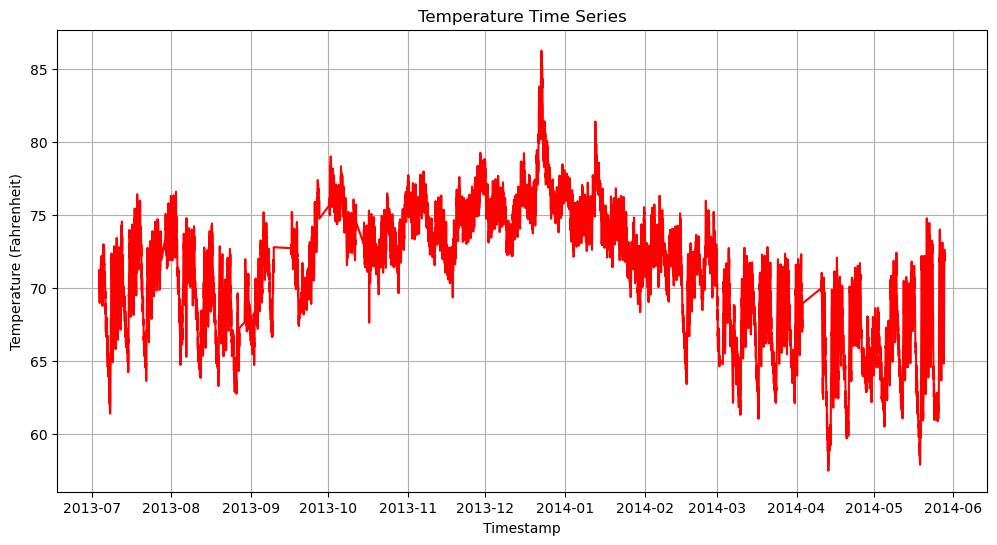

In [95]:
plt.figure(figsize = (12,6))
plt.plot(dataset['timestamp'], dataset['value'], color = 'red')
plt.title('Temperature Time Series')
plt.xlabel('Timestamp')
plt.ylabel('Temperature (Fahrenheit)')
plt.grid(True)
plt.show()

**2) Perform Feature Engineering on the dataset such that new features to be added.
Specifically, you need to create a feature that will indicate the day of the week and time
of the day. Namely, there should be four (4) categories (clusters?) for the feature, name
it 'dtcat' (date-time-categor**
y):
- Weekday Day
- Weekday Night
- Weekend Day
- Weekend Night

In [96]:
#Below code helps us to find the name of the day
dataset['day_of_week'] = dataset['timestamp'].dt.day_name()
#Below code helps us to extact the hour of the day
dataset['hour'] = dataset['timestamp'].dt.hour

In [97]:
dataset.head()

,timestamp,value,day_of_week,hour
0,2013-07-04 00:00:00,69.880835,Thursday,0
1,2013-07-04 01:00:00,71.220227,Thursday,1
2,2013-07-04 02:00:00,70.877805,Thursday,2
3,2013-07-04 03:00:00,68.959400,Thursday,3
4,2013-07-04 04:00:00,69.283551,Thursday,4


**Defining a function to find weekday - day, weekday - night, weekend - day and weekend - night**

In [98]:
day_start_hour = 7 # which is 7 Am
day_end_hour = 17 # which is 7 Pm

def categorize_datetime(row):
    if row['day_of_week'] in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']:
        if day_start_hour <= row['hour'] <= day_end_hour:
            return 'Weekday Day'
        else:
            return 'Weekday Night'
    else:  
        if day_start_hour <= row['hour'] <= day_end_hour:
            return 'Weekend Day'
        else:
            return 'Weekend Night'

In [99]:
dataset['Week/WeekEnd/Day/Night'] = dataset.apply(categorize_datetime, axis=1)

In [100]:
dataset.head()

,timestamp,value,day_of_week,hour,Week/WeekEnd/Day/Night
0,2013-07-04 00:00:00,69.880835,Thursday,0,Weekday Night
1,2013-07-04 01:00:00,71.220227,Thursday,1,Weekday Night
2,2013-07-04 02:00:00,70.877805,Thursday,2,Weekday Night
3,2013-07-04 03:00:00,68.959400,Thursday,3,Weekday Night
4,2013-07-04 04:00:00,69.283551,Thursday,4,Weekday Night


**3) Apply the K-Means algorithm to the revised dataset and determine the best value for
K. I would suggest to test K in the range of [1, 20]. Plot a graph showing the number of
clusters (K) in relation to score of each K-Means model. (Look at slide #20 from lecture
for setting up the plot.**..)

In [101]:
from sklearn.cluster import KMeans
X = dataset[['value', 'hour']]
X.head()

,value,hour
0,69.880835,0
1,71.220227,1
2,70.877805,2
3,68.959400,3
4,69.283551,4


In [162]:
wcss = []
for i in range(1,21):
    kmeans =  KMeans(n_clusters = i, n_init = 'auto')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
print(wcss)

[479772.47208812175, 214413.00756401027, 160518.75079460003, 128521.07050952091, 92316.48325921282, 78379.22012433167, 67881.87008967997, 61279.87846469716, 54732.51264913796, 51069.8132473857, 45531.83468644613, 42027.40742339, 38615.85009008668, 36026.64533496823, 33820.72422495592, 32195.699700937494, 30526.825018302072, 29057.328869819383, 27465.113011367197, 26106.314443732575]


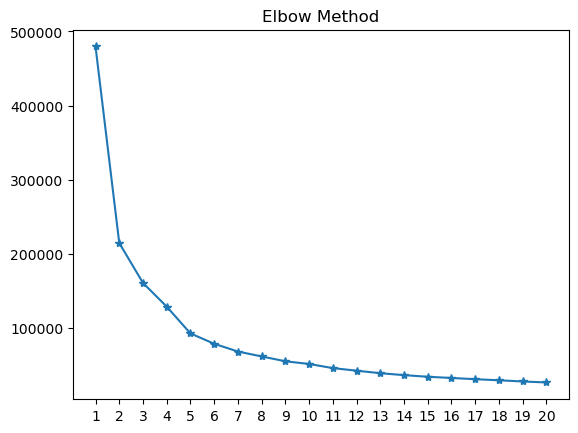

In [163]:
plt.plot(range(1,21), wcss, marker = '*')
plt.xticks(range(1,21))
plt.title('Elbow Method')
plt.show()

**From the above elbow method we can say that the optimal k value is 5**

In [164]:
from sklearn.metrics import silhouette_score
silhouette_scores = []
for i in range(2, 21):
    kmeans = KMeans(n_clusters = i, n_init = 'auto')
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

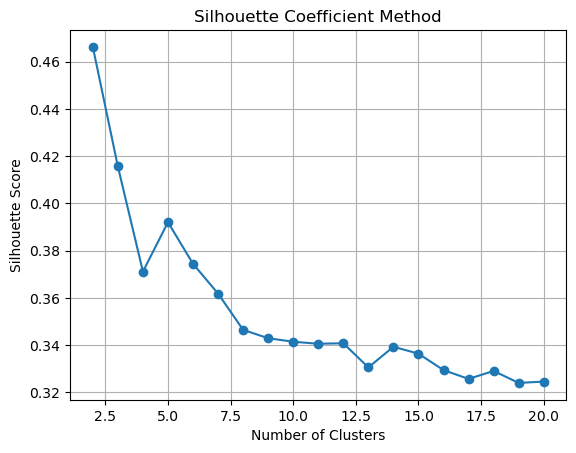

In [165]:
plt.plot(range(2, 21), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Coefficient Method')
plt.grid(True)
plt.show()

**From the Silhouette Coefficient method the optimal k value is 2**

# Applying K Means Algorithm for both the k values from Elbow method and Shilhouette Cofficient Method

In [166]:
import seaborn as sns

In [167]:
# Elbow Method
k_means_1 = KMeans(n_clusters=5, n_init="auto")
k_means_1.fit(X)
y_pred_1 = k_means_1.predict(X)
dataset["label_1"] = y_pred_1
dataset.head()

,timestamp,value,day_of_week,hour,Week/WeekEnd/Day/Night,label_1,label_2
0,2013-07-04 00:00:00,69.880835,Thursday,0,Weekday Night,4,1
1,2013-07-04 01:00:00,71.220227,Thursday,1,Weekday Night,4,1
2,2013-07-04 02:00:00,70.877805,Thursday,2,Weekday Night,4,1
3,2013-07-04 03:00:00,68.959400,Thursday,3,Weekday Night,2,1
4,2013-07-04 04:00:00,69.283551,Thursday,4,Weekday Night,2,1


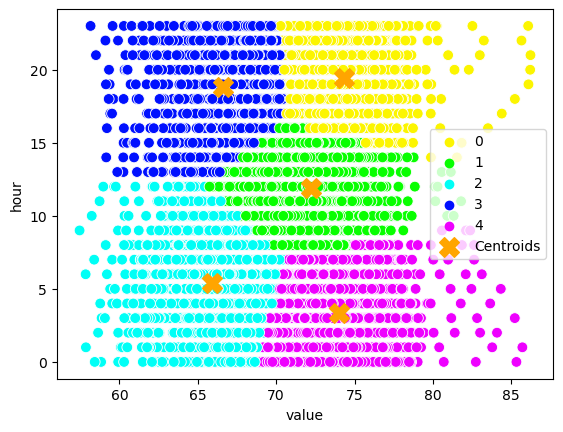

In [168]:
centroids = k_means_1.cluster_centers_
colors = sns.color_palette('hsv', n_colors=k_means_1.n_clusters)
# Plot scatterplot of the clusters
sns.scatterplot(
    x="value",
    y="hour",
    hue="label_1", 
    palette=colors, 
    legend="full", 
    data=dataset, 
    s=60
)

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='orange', label='Centroids')
plt.legend()
plt.show()

In [169]:
#silhouette method
k_means_2 = KMeans(n_clusters=2, n_init="auto")
k_means_2.fit(X)
y_pred_2 = k_means_2.predict(X)
dataset["label_2"] = y_pred_2
dataset.head()

,timestamp,value,day_of_week,hour,Week/WeekEnd/Day/Night,label_1,label_2
0,2013-07-04 00:00:00,69.880835,Thursday,0,Weekday Night,4,1
1,2013-07-04 01:00:00,71.220227,Thursday,1,Weekday Night,4,1
2,2013-07-04 02:00:00,70.877805,Thursday,2,Weekday Night,4,1
3,2013-07-04 03:00:00,68.959400,Thursday,3,Weekday Night,2,1
4,2013-07-04 04:00:00,69.283551,Thursday,4,Weekday Night,2,1


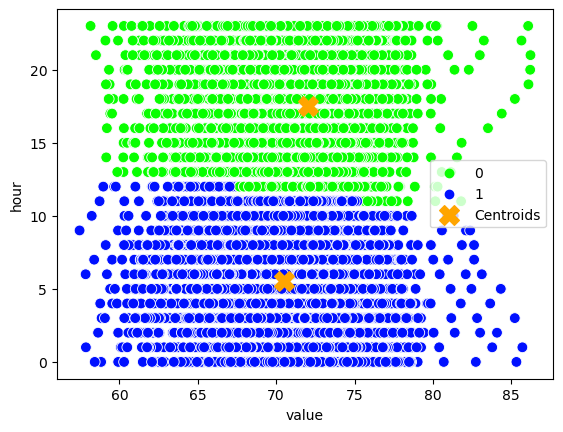

In [170]:
centroids = k_means_2.cluster_centers_
colors = sns.color_palette('hsv', n_colors=k_means_2.n_clusters)
# Plot scatterplot of the clusters
sns.scatterplot(
    x="value",
    y="hour",
    hue="label_2", 
    palette=colors, 
    legend="full", 
    data=dataset, 
    s=60
)

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='orange', label='Centroids')
plt.legend()
plt.show()

**4) Apply the Gaussian distribution (EllipticEnvelope) algorithm, as defined at step 2. 
(Use this command: from sklearn.covariance import EllipticEnvelope 
List anomalies (if any) in each category a show them graphically**y.

In [136]:
from sklearn.covariance import EllipticEnvelope

In [137]:
categories = dataset['Week/WeekEnd/Day/Night'].unique()

In [138]:
anomalies = {}
for category in categories:
    category_data = X[dataset['Week/WeekEnd/Day/Night'] == category]
    envelope = EllipticEnvelope(contamination=0.01) 
    envelope.fit(category_data)
    outliers = envelope.predict(category_data) == -1
    anomalies[category] = category_data[outliers]

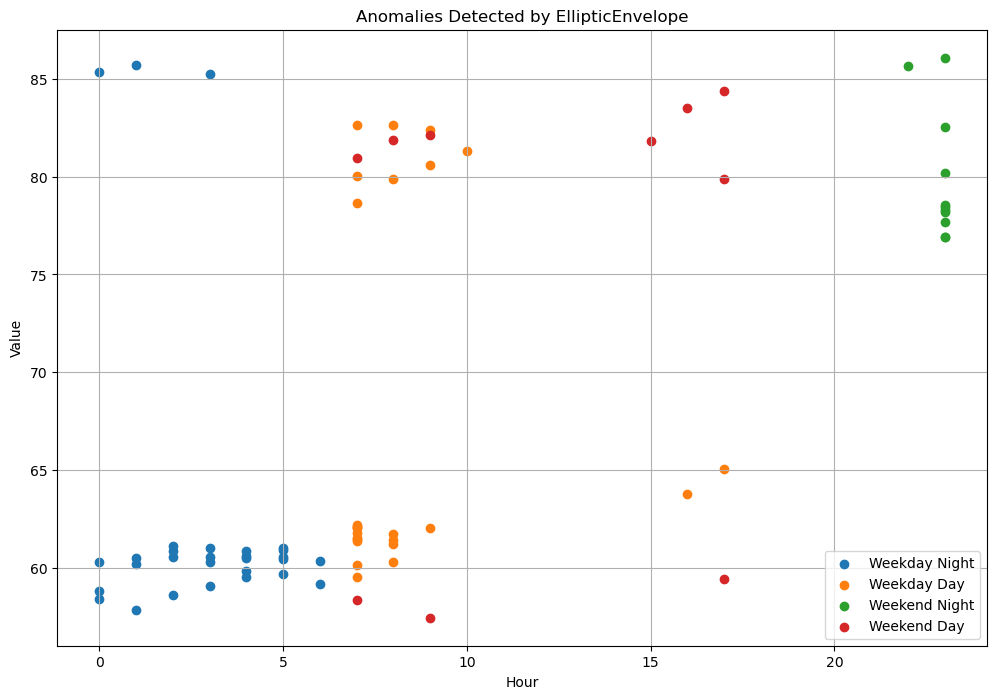

In [139]:
plt.figure(figsize=(12, 8))
for category, anomaly in anomalies.items():
    plt.scatter(anomaly['hour'], anomaly['value'], label=category)
plt.xlabel('Hour')
plt.ylabel('Value')
plt.title('Anomalies Detected by EllipticEnvelope')
plt.legend()
plt.grid(True)
plt.show()

In [140]:
for category, anomaly in anomalies.items():
    print(f"Anomalies in category '{category}':")
    print(anomaly_data)

Anomalies in category 'Weekday Night':
          value  hour
1915  76.154735    16
1916  76.735447    17
1930  76.884553     7
1931  77.296957     8
1940  76.113752    17
...         ...   ...
7172  61.867675    17
7186  62.288786     7
7187  61.790992     8
7188  61.235089     9
7196  62.320029    17

[93 rows x 2 columns]
Anomalies in category 'Weekday Day':
          value  hour
1915  76.154735    16
1916  76.735447    17
1930  76.884553     7
1931  77.296957     8
1940  76.113752    17
...         ...   ...
7172  61.867675    17
7186  62.288786     7
7187  61.790992     8
7188  61.235089     9
7196  62.320029    17

[93 rows x 2 columns]
Anomalies in category 'Weekend Night':
          value  hour
1915  76.154735    16
1916  76.735447    17
1930  76.884553     7
1931  77.296957     8
1940  76.113752    17
...         ...   ...
7172  61.867675    17
7186  62.288786     7
7187  61.790992     8
7188  61.235089     9
7196  62.320029    17

[93 rows x 2 columns]
Anomalies in category 'W

**5) Apply the Isolation Forest algorithm at each category, as defined step 2 
(Use this command frm  sklearn.ensemble import IsolationForest 
Li t anomalies (if any) in each category and show them graphicall**y.

In [141]:
from sklearn.ensemble import IsolationForest

In [142]:
anomalies_isolation = {}
for category in categories:
    category_data = X[dataset['Week/WeekEnd/Day/Night'] == category]
    isolation_forest = IsolationForest(contamination=0.01)  # 10% contamination assumption
    isolation_forest.fit(category_data)
    outliers = isolation_forest.predict(category_data) == -1
    anomalies_isolation[category] = category_data[outliers]

C:\Users\rtaru\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\rtaru\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\rtaru\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\rtaru\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


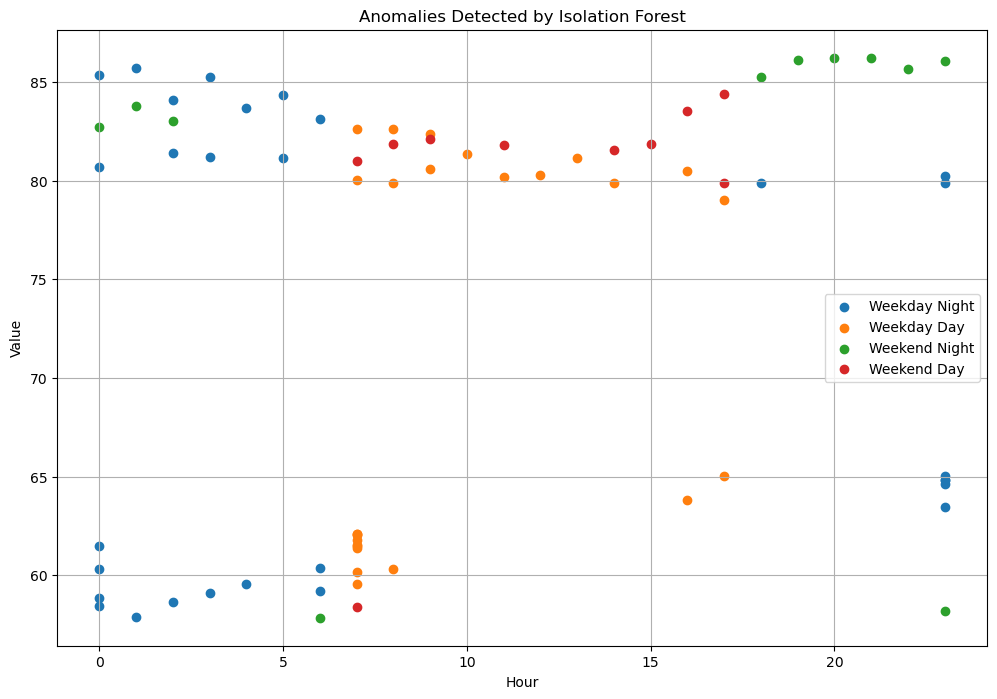

In [143]:
plt.figure(figsize=(12, 8))
for category, anomaly in anomalies_isolation.items():
    plt.scatter(anomaly['hour'], anomaly['value'], label=category)
plt.xlabel('Hour')
plt.ylabel('Value')
plt.title('Anomalies Detected by Isolation Forest')
plt.legend()
plt.grid(True)
plt.show()

In [144]:
for category, anomaly in anomalies_isolation.items():
    print(f"Anomalies in category '{category}':")
    print(anomaly)

Anomalies in category 'Weekday Night':
          value  hour
3725  85.326165     0
3726  85.705990     1
3727  84.086971     2
3728  85.222277     3
3729  83.653968     4
3730  84.329000     5
3731  83.118241     6
3743  79.879531    18
3748  80.243625    23
3749  80.691540     0
3751  81.391297     2
3752  81.170884     3
3754  81.128075     5
3772  79.854599    23
6195  58.832494     0
6199  59.541327     4
6201  59.202451     6
6363  60.296951     0
6578  65.009368    23
6602  64.848150    23
6699  61.491604     0
6722  64.820732    23
6746  64.642652    23
7035  58.423639     0
7036  57.861906     1
7037  58.639295     2
7038  59.074691     3
7041  60.375894     6
7058  63.475736    23
Anomalies in category 'Weekday Day':
          value  hour
3732  82.627288     7
3733  82.622298     8
3734  82.373437     9
3735  81.323119    10
3736  80.153694    11
3737  80.296990    12
3738  81.142450    13
3739  79.874509    14
3741  80.469549    16
3742  79.032214    17
3756  80.021830     7


**6) Which of the two (2) models performs better on detecting anomalies?**

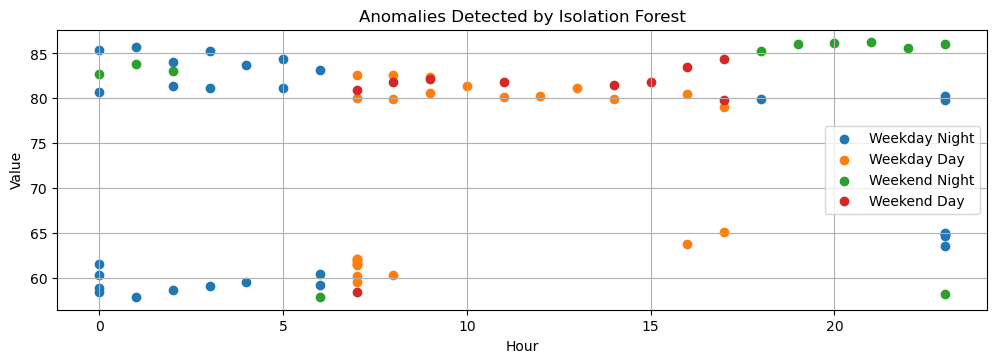

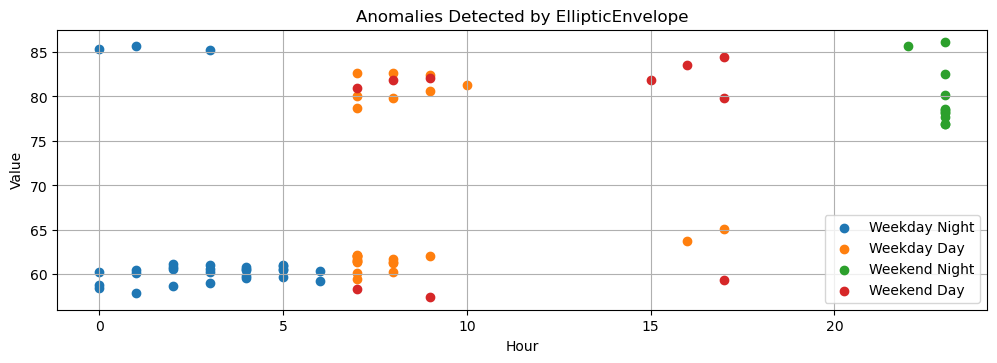

<Figure size 640x480 with 0 Axes>

In [145]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
for category, anomaly in anomalies_isolation.items():
    plt.scatter(anomaly['hour'], anomaly['value'], label=category)
plt.xlabel('Hour')
plt.ylabel('Value')
plt.title('Anomalies Detected by Isolation Forest')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 2)
for category, anomaly in anomalies.items():
    plt.scatter(anomaly['hour'], anomaly['value'], label=category)
plt.xlabel('Hour')
plt.ylabel('Value')
plt.title('Anomalies Detected by EllipticEnvelope')
plt.legend()
plt.grid(True)
plt.show()

plt.tight_layout()
plt.show()

# **Conclusion:**

    - As, we can see that both algorithms has its pros and cons
    - For this particular dataset, the Isolation Forest performs consistently throughout the data points to find the outliers
    - Whereas, The Gussian Elliptic Envelope uses probabilistic methods to find the anomalies.
    - We can see from the above Scatter Plot of Elliptic Envelope it is not as consistent as Isolation Forest where from hour 10 to 15 it didnt find any anomalies.
